In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import timeit

import heapq
from collections import deque

# Load data

In [3]:
# 역간 소요시간 및 환승시간 반영된 인접행렬 로드
subway_matrix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/자료 알고리즘 및 구조/finalterm_project/data/adjacency_matrix_2.csv')
subway_matrix.head()

,subway_name,"1,소요산","1,동두천","1,보산","1,동두천중앙","1,지행","1,덕정","1,덕계","1,양주","1,녹양",...,"5,하남풍산","5,하남시청","5,하남검단산","5,둔촌동","5,올림픽공원","5,방이","5,오금","5,개롱","5,거여","5,마천"
0,"1,소요산",0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"1,동두천",4,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"1,보산",0,2,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"1,동두천중앙",0,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"1,지행",0,0,0,1,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Adjecency_list

In [4]:
def adjacency_matrix_to_list(adj_matrix):
    '''
    key: 정점의 인덱스
    value: 해당 정점과 연결된 이웃 정점 정보 (이웃 정점 인덱스, 가중치)
    '''
    adj_list = []
    num_vertices = len(adj_matrix)
    
    for i in range(num_vertices):
        adj_list.append([])
        for j in range(num_vertices):
            if adj_matrix[i][j] != 0:
                adj_list[i].append((j, adj_matrix[i][j]))
    
    return adj_list

In [5]:
subway_graph = subway_matrix.drop('subway_name', axis=1).values
subway_li = adjacency_matrix_to_list(subway_graph)
subway_li

[[(1, 4)],
 [(0, 4), (2, 2)],
 [(1, 2), (3, 2)],
 [(2, 2), (4, 1)],
 [(3, 1), (5, 4)],
 [(4, 4), (6, 3)],
 [(5, 3), (7, 5)],
 [(6, 5), (8, 2)],
 [(7, 2), (9, 2)],
 [(8, 2), (10, 2)],
 [(9, 2), (11, 2)],
 [(10, 2), (12, 2)],
 [(11, 2), (13, 3)],
 [(12, 3), (14, 2)],
 [(13, 2), (15, 2)],
 [(14, 2), (16, 2)],
 [(15, 2), (17, 1), (200, 2)],
 [(16, 1), (18, 2)],
 [(17, 2), (19, 2)],
 [(18, 2), (20, 2)],
 [(19, 2), (21, 2)],
 [(20, 2), (22, 1)],
 [(21, 1), (23, 2)],
 [(22, 2), (24, 3)],
 [(23, 3), (25, 2)],
 [(24, 2), (26, 2)],
 [(25, 2), (27, 2), (145, 4)],
 [(26, 2), (28, 2)],
 [(27, 2), (29, 2), (209, 5)],
 [(28, 2), (30, 2)],
 [(29, 2), (31, 1), (170, 5), (269, 7)],
 [(30, 1), (32, 2)],
 [(31, 2), (33, 2), (141, 2)],
 [(32, 2), (34, 3), (214, 3)],
 [(33, 3), (35, 2)],
 [(34, 2), (36, 3)],
 [(35, 3), (37, 2)],
 [(36, 2), (38, 1)],
 [(37, 1), (39, 2), (260, 6)],
 [(38, 2), (40, 2)],
 [(39, 2), (41, 2), (131, 2)],
 [(40, 2), (42, 2), (62, 4)],
 [(41, 2), (43, 2)],
 [(42, 2), (44, 2)],
 [(43

In [6]:
def calculate_node_edge_count(graph):
    num_nodes = len(graph)
    num_edges = sum(len(edges) for edges in graph)
    return num_nodes, num_edges

num_nodes, num_edges = calculate_node_edge_count(subway_li)
print(f"노드 수(N): {num_nodes}")
print(f"간선 수(N): {num_edges}")

노드 수(N): 301
간선 수(N): 643


# Spanning Tree

In [7]:
def generate_spanning_tree(graph, start_vertex, mode, num_times):

    if mode == 'DFS':
        execution_time = timeit.timeit(lambda: dfs(graph, start_vertex), number=num_times)
        spanning_tree = dfs(graph, start_vertex)
    elif mode == 'BFS':
        execution_time = timeit.timeit(lambda: bfs(graph, start_vertex), number=num_times)  
        spanning_tree = bfs(graph, start_vertex)
    elif mode == 'Kruskal':
        execution_time = timeit.timeit(lambda: kruskal(graph), number=num_times)
        spanning_tree = kruskal(graph)
    elif mode == 'Prim':
        execution_time = timeit.timeit(lambda: prim(graph, start_vertex), number=num_times)
        spanning_tree = prim(graph, start_vertex)
    elif mode == 'Custom Kruskal':
        execution_time = timeit.timeit(lambda: custom_kruskal(graph), number=num_times)
        spanning_tree = custom_kruskal(graph)
    elif mode == 'Custom Prim':
        execution_time = timeit.timeit(lambda: custom_prim(graph, start_vertex), number=num_times)
        spanning_tree = custom_prim(graph, start_vertex)
    
    return spanning_tree, execution_time / num_times

## 1. DFS

In [8]:
def dfs(graph, start):
    '''스택(Stack) 자료구조를 활용한 반복 구조로 구현된 DFS(Depth-First Search)'''
    n = len(graph)
    visited = [False] * n
    spanning_tree = [[] * n for _ in range(n)]
    
    stack = [start]
    visited[start] = True
    
    while stack:
        v = stack.pop()
        # 현재 노드와 인접한 모든 노드에 대해 탐색 
        for u, weight in graph[v]:
            if not visited[u]:
                spanning_tree[v].append((u, weight))
                spanning_tree[u].append((v, weight))
                stack.append(u)
                visited[u] = True
    
    return spanning_tree

In [9]:
generate_spanning_tree(subway_li, 0, 'DFS', 10)

([[(1, 4)],
  [(0, 4), (2, 2)],
  [(1, 2), (3, 2)],
  [(2, 2), (4, 1)],
  [(3, 1), (5, 4)],
  [(4, 4), (6, 3)],
  [(5, 3), (7, 5)],
  [(6, 5), (8, 2)],
  [(7, 2), (9, 2)],
  [(8, 2), (10, 2)],
  [(9, 2), (11, 2)],
  [(10, 2), (12, 2)],
  [(11, 2), (13, 3)],
  [(12, 3), (14, 2)],
  [(13, 2), (15, 2)],
  [(14, 2), (16, 2)],
  [(15, 2), (17, 1), (200, 2)],
  [(16, 1)],
  [(19, 2)],
  [(20, 2), (18, 2)],
  [(21, 2), (19, 2)],
  [(22, 1), (20, 2)],
  [(23, 2), (21, 1)],
  [(24, 3), (22, 2)],
  [(25, 2), (23, 3)],
  [(26, 2), (24, 2)],
  [(145, 4), (25, 2), (27, 2)],
  [(26, 2)],
  [(209, 5)],
  [(30, 2)],
  [(170, 5), (29, 2)],
  [(32, 2)],
  [(33, 2), (31, 2), (141, 2)],
  [(214, 3), (32, 2), (34, 3)],
  [(33, 3), (35, 2)],
  [(34, 2), (36, 3)],
  [(35, 3), (37, 2)],
  [(36, 2)],
  [(260, 6)],
  [(40, 2)],
  [(131, 2), (39, 2)],
  [(62, 4), (42, 2)],
  [(41, 2), (43, 2)],
  [(42, 2), (44, 2)],
  [(43, 2), (45, 2)],
  [(44, 2), (46, 1)],
  [(45, 1), (47, 2)],
  [(46, 2), (48, 2)],
  [(47, 2

## 2. BFS

In [10]:
def bfs(graph, start):
    '''큐(Queue) 자료구조를 활용한 반복 구조로 구현된 BFS(Breadth-First Search)'''
    n = len(graph)
    visited = [False] * n
    spanning_tree = [[] * n for _ in range(n)]
    
    queue = deque()
    queue.append(start)
    visited[start] = True

    while queue:
        v = queue.popleft()
        # 현재 노드와 인접한 모든 노드에 대해 탐색
        for u, weight in graph[v]:
            if not visited[u]:
                queue.append(u)
                visited[u] = True
                spanning_tree[v].append((u, weight))
                spanning_tree[u].append((v, weight))

    return spanning_tree

## 3. Kruskal

In [11]:
class DisjointSet:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
    
    def find(self, x):
        '''x의 부모를 찾는 메서드'''
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    
    def union(self, x, y):
        '''x, y 두 집합을 합치는 메서드'''
        x_root = self.find(x)
        y_root = self.find(y)

        if x_root == y_root:
            return

        if self.rank[x_root] < self.rank[y_root]:
            self.parent[x_root] = y_root
        elif self.rank[x_root] > self.rank[y_root]:
            self.parent[y_root] = x_root
        else:
            self.parent[y_root] = x_root
            self.rank[x_root] += 1

In [12]:
def kruskal(graph):
    '''우선순위 큐(Priority Queue) 자료구조를 활용한 반복 구조로 구현된 Kruskal 알고리즘'''
    n = len(graph)
    visited = [False] * n
    spanning_tree = [[] * n for _ in range(n)]
    
    edges = []
    for u in range(n):
        for v, weight in graph[u]:
            if u < v:  # 중복 간선을 피하기 위해 u < v인 경우에만 추가
                heapq.heappush(edges, (weight, u, v))  
    
    disjoint_set = DisjointSet(n)
    
    while edges:
        weight, u, v = heapq.heappop(edges)
        if disjoint_set.find(u) != disjoint_set.find(v):
            disjoint_set.union(u, v)
            spanning_tree[u].append((v, weight))
            spanning_tree[v].append((u, weight))
    
    return spanning_tree

## 4. Prim

In [13]:
def prim(graph, start):
    '''우선순위 큐(Priority Queue) 자료구조를 활용한 반복 구조로 구현된 Prim 알고리즘'''
    n = len(graph)
    visited = [False] * n
    spanning_tree = [[] * n for _ in range(n)]
    
    visited[start] = True    
    edges = []
    for v, weight in graph[start]:
        if weight != 0:
            heapq.heappush(edges, (weight, start, v))

    while edges:
        weight, u, v = heapq.heappop(edges)

        if visited[v]:
            continue

        visited[v] = True
        spanning_tree[u].append((v, weight))
        spanning_tree[v].append((u, weight))

        # 새로 추가된 정점과 연결된 간선을 최소 힙에 추가
        for next_v, next_weight in graph[v]:
            if not visited[next_v] and next_weight != 0:
                heapq.heappush(edges, (next_weight, v, next_v))

    return spanning_tree

# Path Finding Algorithms

In [14]:
def find_shortest_path(graph, mode, num_times):
    ''''''
    if mode == 'Dijkstra':
        execution_time = timeit.timeit(lambda: dijkstra(graph, start_vertex, end_vertex), number=num_times)
        found_path, cost = dijkstra(graph, start_vertex, end_vertex)
    elif mode == 'A_star':
        execution_time = timeit.timeit(lambda: a_star(graph, start_vertex, end_vertex, heu_matrix.values), number=num_times) 
        found_path, cost = a_star(graph, start_vertex, end_vertex, heu_matrix.values)
    elif mode == 'ford':
        execution_time = timeit.timeit(lambda: ford(graph, start_vertex, end_vertex), number=num_times)  
        found_path, cost = ford(graph, start_vertex, end_vertex)
    elif mode == 'bidirectional':
        execution_time = timeit.timeit(lambda: bidirectional(graph, start_vertex, end_vertex), number=num_times)  
        found_path, cost = bidirectional(graph, start_vertex, end_vertex)

    found_path_li = [subway_names[i] for i in found_path]
    
    return found_path_li, cost, execution_time / num_times

## 1. Dijkstra algorithm

In [15]:
def dijkstra(graph, start_vertex, end_vertex):
    # 초기화
    n = len(graph)
    visited = [False] * n
    previous_vertex = [None] * n
    
    distance = [float('inf')] * n

    # 시작 정점의 시간를 0으로 설정
    distance[start_vertex] = 0
    
    # 우선순위 큐에 (시간, 정점) 쌍을 넣음
    pq = [(0, start_vertex)]
    
    while pq:
        # 우선순위 큐에서 시간이 가장 짧은 정점을 꺼냄
        current_distance, current_vertex = heapq.heappop(pq)
        
        # 이미 방문한 정점이면 스킵
        if visited[current_vertex]:
            continue
        
        # 현재 정점을 방문 처리
        visited[current_vertex] = True
        
        # 목적지에 도달한 경우, 탐색을 종료하고 최단 경로와 비용을 반환
        if current_vertex == end_vertex:
            path = []
            while previous_vertex[current_vertex] is not None:
                path.append(current_vertex)
                current_vertex = previous_vertex[current_vertex]
            path.append(current_vertex)
            path.reverse()
            return path, distance[end_vertex]
        
        # 현재 정점과 연결된 인접 정점들을 탐색
        for neighbor_vertex, weight in graph[current_vertex]:
            # 새로운 거리를 계산
            new_distance = distance[current_vertex] + weight
            
            # 새로운 거리가 기존의 거리보다 짧으면 업데이트
            if new_distance < distance[neighbor_vertex]:
                distance[neighbor_vertex] = new_distance
                previous_vertex[neighbor_vertex] = current_vertex
                heapq.heappush(pq, (new_distance, neighbor_vertex))
    
    # 목적지에 도달할 수 없는 경우
    return None, None

## 2. A* algorithm

In [16]:
heu_matrix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/자료 알고리즘 및 구조/finalterm_project/heuristics/manhatten.csv').drop('Unnamed: 0', axis=1)
heu_matrix.head()

,"1,소요산","1,동두천","1,보산","1,동두천중앙","1,지행","1,덕정","1,덕계","1,양주","1,녹양","1,가능",...,"5,하남풍산","5,하남시청","5,하남검단산","5,둔촌동","5,올림픽공원","5,방이","5,오금","5,개롱","5,거여","5,마천"
0,0.000000,2.017967,3.367525,4.619796,5.613203,10.367758,12.923837,17.446341,18.874615,19.975533,...,44.004397,44.635468,45.087879,45.557486,39.157465,38.616565,39.732290,40.750497,40.981717,45.419445
1,2.017967,0.000000,1.354152,2.604426,3.596684,8.362336,10.909341,15.428374,16.856648,17.957565,...,41.998975,42.630047,43.082458,43.552065,37.152043,36.611144,37.726869,38.745076,38.976296,43.414024
2,3.367525,1.354152,0.000000,1.252271,2.245678,7.008184,9.556311,14.078816,15.507090,16.608007,...,40.644823,41.275895,41.728306,42.197913,35.797891,35.256992,36.372717,37.390924,37.622144,42.059872
3,4.619796,2.604426,1.252271,0.000000,0.993407,5.757910,8.304915,12.826546,14.254819,15.355737,...,39.394549,40.025620,40.478032,40.947639,34.547617,34.006718,35.122442,36.140650,36.371870,40.809598
4,5.613203,3.596684,2.245678,0.993407,0.000000,4.765653,7.312658,11.833138,13.261412,14.362330,...,38.402292,39.033363,39.485774,39.955381,33.555360,33.014460,34.130185,35.148392,35.379612,39.817340


In [17]:
def a_star(graph, start_vertex, end_vertex, heu_matrix):
    # 초기화
    n = len(graph)
    previous_vertex = [None] * n
    
    open_list = []
    close_list = set()
    
    # 출발 노드로부터 현재 노드까지의 실제 비용 (거리)
    g = [float('inf')] * n
    g[start_vertex] = 0
    
    # 목적지까지의 예상 비용 (휴리스틱)
    h = heu_matrix[start_vertex][end_vertex]
    
    # 목적지까지의 총 예상 비용 (휴리스틱 + 거리)
    f = g + h
    
    # 우선순위 큐에 (총 예상 비용, 노드) 쌍을 넣음
    heapq.heappush(open_list, (f, start_vertex))
    
    while open_list:
        # 우선순위 큐에서 총 예상 시간이 가장 짧은 노드를 꺼냄
        _, current_vertex = heapq.heappop(open_list)
        
         # 목적지에 도달한 경우, 탐색을 종료하고 최단 경로와 비용을 반환
        if current_vertex == end_vertex:
            path = [current_vertex]
            while previous_vertex[current_vertex] is not None:
                current_vertex = previous_vertex[current_vertex]
                path.append(current_vertex)
            return path[::-1], g[end_vertex]
        
        # 현재 노드를 Close List에 추가
        close_list.add(current_vertex)
        
        # 인접 노드 탐색
        for neighbor_vertex, weight in graph[current_vertex]:
            if neighbor_vertex not in close_list:
                # 인접 노드에서 상태값 계산
                tentative_g = g[current_vertex] + weight
                
                # 인접 노드를 Open List에 추가
                if tentative_g < g[neighbor_vertex]:
                    h = heu_matrix[neighbor_vertex][end_vertex]
                    f = tentative_g + h
                    g[neighbor_vertex] = tentative_g
                    previous_vertex[neighbor_vertex] = current_vertex
                    heapq.heappush(open_list, (f, neighbor_vertex))
    
    # 목적지에 도달할 수 없는 경우
    return None, None

## 3. Bidirectional Search

In [18]:
def bidirectional(graph, start, end):
    # 시작 정점과 도착 정점을 포함하는 두 개의 큐 초기화
    forward_queue = [(start, 0)]
    backward_queue = [(end, 0)]
    
    # 시작 정점과 도착 정점에서의 거리 초기화
    forward_distances = [float('inf')] * len(graph)
    backward_distances = [float('inf')] * len(graph)
    forward_distances[start] = 0
    backward_distances[end] = 0
    
    # 시작 정점과 도착 정점을 포함하는 두 개의 집합 초기화
    forward_visited = set()
    backward_visited = set()
    forward_visited.add(start)
    backward_visited.add(end)
    
    # 최단 경로의 이전 정점을 저장하는 배열 초기화
    forward_previous = [None] * len(graph)
    backward_previous = [None] * len(graph)
    
    shortest_time = float('inf')
    meeting_point = None
    
    while forward_queue and backward_queue:
        # 시작 정점에서 진행하는 탐색
        forward_current, forward_distance = forward_queue.pop(0)
        forward_visited.add(forward_current)
        
        # 도착 정점과 마주칠 경우
        if forward_current in backward_visited:
            meeting_point = forward_current
            shortest_time = forward_distance + backward_distances[forward_current]  # 최단 시간 계산
            break
        
        # 인접한 정점들에 대해 탐색
        for neighbor, weight in graph[forward_current]:
            new_distance = forward_distance + weight
            if new_distance < forward_distances[neighbor]:
                forward_distances[neighbor] = new_distance
                forward_previous[neighbor] = forward_current
                forward_queue.append((neighbor, new_distance))
        
        # 도착 정점에서 진행하는 탐색
        backward_current, backward_distance = backward_queue.pop(0)
        backward_visited.add(backward_current)
        
        # 시작 정점과 마주칠 경우
        if backward_current in forward_visited:
            meeting_point = backward_current
            shortest_time = backward_distance + forward_distances[backward_current]  # 최단 시간 계산
            break
        
        # 인접한 정점들에 대해 탐색
        for neighbor, weight in graph[backward_current]:
            new_distance = backward_distance + weight
            if new_distance < backward_distances[neighbor]:
                backward_distances[neighbor] = new_distance
                backward_previous[neighbor] = backward_current
                backward_queue.append((neighbor, new_distance))
    
    shortest_path = []
    
    if meeting_point is not None:
        # 시작 정점에서 마주친 경우
        forward_path = []
        node = meeting_point
        while node is not None:
            forward_path.append(node)
            node = forward_previous[node]
        forward_path.reverse()
        
        # 도착 정점에서 마주친 경우
        backward_path = []
        node = meeting_point
        node = backward_previous[node]
        while node is not None:
            backward_path.append(node)
            node = backward_previous[node]
        
        # 시작 정점부터 마주친 지점까지의 경로와 도착 정점부터 마주친 지점까지의 경로를 합쳐 최단 경로 생성
        shortest_path = forward_path + backward_path
    
    return shortest_path, shortest_time

# Baseline Comparison

In [19]:
num_times = 100

In [21]:
subway_names = list(subway_matrix['subway_name'].values)

start_vertex = int(subway_names.index(input("출발지 입력 (호선,역이름): ")))
end_vertex = int(subway_names.index(input("목적지 입력 (호선,역이름): ")))

# 
path_find_mode_li = ['Dijkstra', 'A_star']
spanning_tree_mode_li = ['DFS', 'BFS', 'Kruskal', 'Prim']

results = pd.DataFrame(columns=['spanning_tree', 'path_find', 'spanning_tree_runtime', 'path_find_runtime', 'total_runtime'])

# 
for spanning_tree_mode in spanning_tree_mode_li:
    
    # 그래프 초기화
    subway_graph = subway_matrix.drop('subway_name', axis=1).values
    subway_li = adjacency_matrix_to_list(subway_graph)

    # Spanning tree 생성 (100회 평균 런타임 측정)
    spanning_tree, spanning_tree_runtime = generate_spanning_tree(subway_li, start_vertex, spanning_tree_mode, num_times)
    
    for path_find_mode in path_find_mode_li:        
            
        # 최적 경로 탐색 (100회 평균 런타임 측정)
        shortest_path, cost, path_find_runtime = find_shortest_path(spanning_tree, path_find_mode, num_times)
        
        total_runtime = spanning_tree_runtime + path_find_runtime
        
        print("\n------------------------------")
        print(f"Spanning tree 알고리즘: {spanning_tree_mode}")
        print(f"경로 탐색 알고리즘: {path_find_mode}")
        
        print(f"\n{num_times}회 평균 런타임")
        print(f"Spanning tree 런타임: {spanning_tree_runtime} (s)")
        print(f"경로 탐색 런타임: {path_find_runtime} (s)")
        print(f"총 런타임: {total_runtime} (s)")
        
        print(f"\n소요 시간: {cost} 분")
        print(f"최단 경로: {shortest_path}")
        
        results.loc[len(results)] = [spanning_tree_mode, path_find_mode, spanning_tree_runtime, path_find_runtime, total_runtime]

출발지 입력 (호선,역이름): 1,소요산
목적지 입력 (호선,역이름): 5,마천

------------------------------
Spanning tree 알고리즘: DFS
경로 탐색 알고리즘: Dijkstra

100회 평균 런타임
Spanning tree 런타임: 0.00010186435000008486 (s)
경로 탐색 런타임: 0.00014894763000000921 (s)
총 런타임: 0.0002508119800000941 (s)

소요 시간: 88 분
최단 경로: ['1,소요산', '1,동두천', '1,보산', '1,동두천중앙', '1,지행', '1,덕정', '1,덕계', '1,양주', '1,녹양', '1,가능', '1,의정부', '1,회룡', '1,망월사', '1,도봉산', '1,도봉', '1,방학', '1,창동', '4,창동', '4,쌍문', '4,수유', '4,미아', '4,미아사거리', '4,길음', '4,성신여대입구', '4,한성대입구', '4,혜화', '4,동대문', '4,동대문역사문화공원', '5,동대문역사문화공원', '5,청구', '5,신금호', '5,행당', '5,왕십리', '5,마장', '5,답십리', '5,장한평', '5,군자', '5,아차산', '5,광나루', '5,천호', '5,강동', '5,둔촌동', '5,올림픽공원', '5,방이', '5,오금', '5,개롱', '5,거여', '5,마천']

------------------------------
Spanning tree 알고리즘: DFS
경로 탐색 알고리즘: A_star

100회 평균 런타임
Spanning tree 런타임: 0.00010186435000008486 (s)
경로 탐색 런타임: 0.0005284772499999235 (s)
총 런타임: 0.0006303416000000084 (s)

소요 시간: 88 분
최단 경로: ['1,소요산', '1,동두천', '1,보산', '1,동두천중앙', '1,지행', '1,덕정', '1,덕계', '1,양주', '1,녹양'

In [22]:
results

,spanning_tree,path_find,spanning_tree_runtime,path_find_runtime,total_runtime
0,DFS,Dijkstra,0.000102,0.000149,0.000251
1,DFS,A_star,0.000102,0.000528,0.000630
2,BFS,Dijkstra,0.000176,0.000673,0.000849
3,BFS,A_star,0.000176,0.001480,0.001655
4,Kruskal,Dijkstra,0.001016,0.000617,0.001632
5,Kruskal,A_star,0.001016,0.001161,0.002176
6,Prim,Dijkstra,0.000518,0.000564,0.001082
7,Prim,A_star,0.000518,0.001221,0.001739


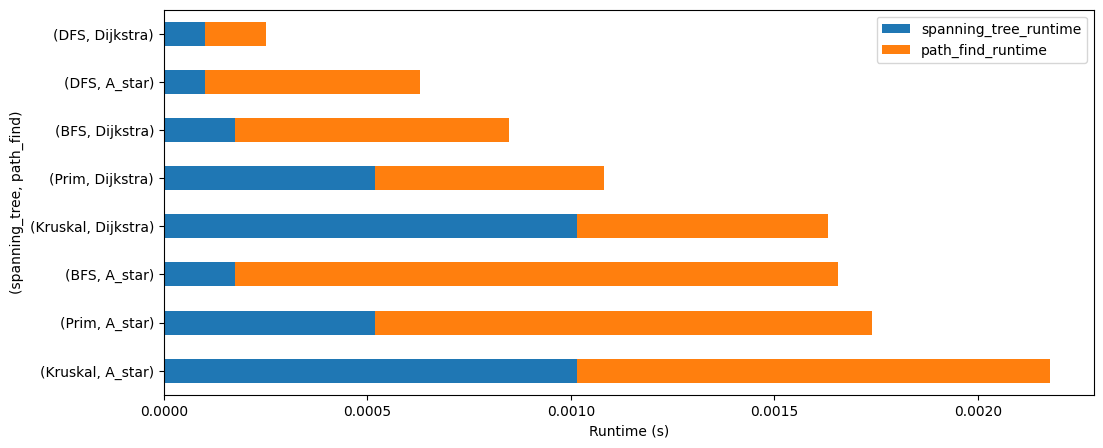

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

sorted_results = results.set_index(['spanning_tree', 'path_find']).sort_values(by='total_runtime', ascending=False)

sorted_results[['spanning_tree_runtime', 'path_find_runtime']].plot(kind='barh', stacked=True, ax=ax)
plt.xlabel("Runtime (s)")
plt.ylabel("(spanning_tree, path_find)")
plt.show()

# Error analysis

In [42]:
subway_matrix['subway_name'].apply(lambda x : x[2:]).value_counts()

동대문역사문화공원    3
종로3가         3
충정로          2
영등포구청        2
신도림          2
            ..
상왕십리         1
한양대          1
뚝섬           1
성수           1
마천           1
Name: subway_name, Length: 279, dtype: int64

In [43]:
def look_index(name):
    return list(subway_matrix['subway_name']).index(name)


def look_name(index):
    return subway_matrix['subway_name'][index]

In [44]:
look_index('4,동대문역사문화공원')

210

In [45]:
dfs(subway_li, 0)[210]

[(209, 1), (102, 2), (211, 2), (271, 3)]

# subway_li

In [46]:
for index, weight in subway_li[look_index('2,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

2,을지로4가
1
2,신당
1
4,동대문역사문화공원
2
5,동대문역사문화공원
5


In [29]:
for index, weight in subway_li[look_index('4,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

2,동대문역사문화공원
2
4,동대문
1
4,충무로
2
5,동대문역사문화공원
3


In [30]:
for index, weight in subway_li[look_index('5,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

2,동대문역사문화공원
5
4,동대문역사문화공원
3
5,을지로4가
2
5,청구
2


In [31]:
for index, weight in subway_li[look_index('1,종로3가')]:
    print(look_name(index))
    print(weight)

1,종로5가
2
1,종각
1
3,종로3가
5
5,종로3가
7


In [32]:
for index, weight in subway_li[look_index('3,종로3가')]:
    print(look_name(index))
    print(weight)

1,종로3가
5
3,안국
1
3,을지로3가
1
5,종로3가
3


In [33]:
for index, weight in subway_li[look_index('5,종로3가')]:
    print(look_name(index))
    print(weight)

1,종로3가
7
3,종로3가
3
5,광화문
2
5,을지로4가
2


In [34]:
for index, weight in subway_li[look_index('3,충무로')]:
    print(look_name(index))
    print(weight)

3,을지로3가
1
3,동대입구
2
4,충무로
2


In [35]:
for index, weight in subway_li[look_index('4,충무로')]:
    print(look_name(index))
    print(weight)

3,충무로
2
4,동대문역사문화공원
2
4,명동
1


# DFS

In [47]:
for index, weight in dfs(subway_li, 0)[look_index('2,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

4,동대문역사문화공원
2


In [48]:
for index, weight in dfs(subway_li, 0)[look_index('4,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

4,동대문
1
2,동대문역사문화공원
2
4,충무로
2
5,동대문역사문화공원
3


In [49]:
for index, weight in dfs(subway_li, 0)[look_index('5,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

4,동대문역사문화공원
3
5,을지로4가
2
5,청구
2


In [50]:
for index, weight in dfs(subway_li, 0)[look_index('1,종로3가')]:
    print(look_name(index))
    print(weight)

3,종로3가
5
1,종로5가
2


In [51]:
for index, weight in dfs(subway_li, 0)[look_index('3,종로3가')]:
    print(look_name(index))
    print(weight)

3,을지로3가
1
1,종로3가
5
3,안국
1
5,종로3가
3


In [54]:
for index, weight in dfs(subway_li, 0)[look_index('5,종로3가')]:
    print(look_name(index))
    print(weight)

3,종로3가
3
5,광화문
2


In [53]:
for index, weight in dfs(subway_li, 0)[look_index('3,충무로')]:
    print(look_name(index))
    print(weight)

3,동대입구
2
3,을지로3가
1


In [52]:
for index, weight in dfs(subway_li, 0)[look_index('4,충무로')]:
    print(look_name(index))
    print(weight)

4,동대문역사문화공원
2


# BFS

In [ ]:
for index, weight in bfs(subway_li, 0)[look_index('2,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in bfs(subway_li, 0)[look_index('4,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in bfs(subway_li, 0)[look_index('5,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in bfs(subway_li, 0)[look_index('1,종로3가')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in bfs(subway_li, 0)[look_index('3,종로3가')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in bfs(subway_li, 0)[look_index('5,종로3가')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in bfs(subway_li, 0)[look_index('3,충무로')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in bfs(subway_li, 0)[look_index('4,충무로')]:
    print(look_name(index))
    print(weight)

# Kruskal

In [ ]:
for index, weight in kruskal(subway_li)[look_index('2,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in kruskal(subway_li)[look_index('4,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in kruskal(subway_li)[look_index('5,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in kruskal(subway_li)[look_index('1,종로3가')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in kruskal(subway_li)[look_index('3,종로3가')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in kruskal(subway_li)[look_index('5,종로3가')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in kruskal(subway_li)[look_index('3,충무로')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in kruskal(subway_li)[look_index('4,충무로')]:
    print(look_name(index))
    print(weight)

# Prim

In [ ]:
for index, weight in prim(subway_li, 0)[look_index('2,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in prim(subway_li, 0)[look_index('4,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in prim(subway_li, 0)[look_index('5,동대문역사문화공원')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in prim(subway_li, 0)[look_index('1,종로3가')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in prim(subway_li, 0)[look_index('3,종로3가')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in prim(subway_li, 0)[look_index('5,종로3가')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in prim(subway_li, 0)[look_index('3,충무로')]:
    print(look_name(index))
    print(weight)

In [ ]:
for index, weight in prim(subway_li, 0)[look_index('4,충무로')]:
    print(look_name(index))
    print(weight)

# Customizing

In [ ]:
subway_info = list(subway_matrix['subway_name'])
subway_names = subway_matrix['subway_name'].apply(lambda x : x[2:])
subway_count = subway_names.value_counts()

# 환승 가능한 역 이름
transfer_names = subway_count[subway_count > 1].index

# 환승 가능한 역 호선, 이름
transfer_set = set()
for transfer_name in transfer_names:
    for subway_name in subway_info:
        if transfer_name in subway_name:
            transfer_set.add(subway_name)
            
# 환승 가능한 역 pair 저장
transfer_pairs = set()
for subway1 in list(transfer_set):
    for subway2 in list(transfer_set):
        if subway1[2:] == subway2[2:] and subway1[0] != subway2[0]:
            transfer_pairs.add((subway1, subway2))
            
# 환승 가능한 간선 정보 저장
transfer_edges = []
for subway1, subway2 in list(transfer_pairs):
    u = subway_info.index(subway1)
    v = subway_info.index(subway2)
    weight = subway_matrix[subway_info].iloc[u, v]
    transfer_edges.append((weight, u, v))

In [ ]:
def custom_kruskal(graph, transfer_edges=transfer_edges):
    '''우선순위 큐(Priority Queue) 자료구조를 활용한 반복 구조로 구현된 Kruskal 알고리즘'''
    n = len(graph)
    visited = [False] * n
    spanning_tree = [[] * n for _ in range(n)]
    
    # 환승 가능한 간선 정보 spanning tree에 우선 저장
    for weight, u, v in transfer_edges:
        spanning_tree[u].append((v, weight))
    
    edges = []
    for u in range(n):
        for v, weight in graph[u]:
            if u < v:  # 중복 간선을 피하기 위해 u < v인 경우에만 추가
                heapq.heappush(edges, (weight, u, v))  
    
    disjoint_set = DisjointSet(n)
    
    while edges:
        weight, u, v = heapq.heappop(edges)
        if disjoint_set.find(u) != disjoint_set.find(v):
            disjoint_set.union(u, v)
            spanning_tree[u].append((v, weight))
            spanning_tree[v].append((u, weight))
    
    return spanning_tree

In [ ]:
def custom_prim(graph, start, transfer_edges=transfer_edges):
    '''우선순위 큐(Priority Queue) 자료구조를 활용한 반복 구조로 구현된 Prim 알고리즘'''
    n = len(graph)
    visited = [False] * n
    spanning_tree = [[] * n for _ in range(n)]
    
    visited[start] = True    
    
    # 환승 가능한 간선 정보 spanning tree에 우선 저장
    for weight, u, v in transfer_edges:
        spanning_tree[u].append((v, weight))
    
    edges = []
    for v, weight in graph[start]:
        if weight != 0:
            heapq.heappush(edges, (weight, start, v))

    while edges:
        weight, u, v = heapq.heappop(edges)

        if visited[v]:
            continue

        visited[v] = True
        spanning_tree[u].append((v, weight))
        spanning_tree[v].append((u, weight))

        # 새로 추가된 정점과 연결된 간선을 최소 힙에 추가
        for next_v, next_weight in graph[v]:
            if not visited[next_v] and next_weight != 0:
                heapq.heappush(edges, (next_weight, v, next_v))

    return spanning_tree

In [ ]:
subway_names = list(subway_matrix['subway_name'].values)

start_vertex = int(subway_names.index(input("출발지 입력 (호선,역이름): ")))
end_vertex = int(subway_names.index(input("목적지 입력 (호선,역이름): ")))

# 
path_find_mode_li = ['Dijkstra', 'A_star']
spanning_tree_mode_li = ['DFS', 'BFS', 'Kruskal', 'Prim', 'Custom Kruskal', 'Custom Prim']

results = pd.DataFrame(columns=['spanning_tree', 'path_find', 'spanning_tree_runtime', 'path_find_runtime', 'total_runtime'])

# 
for spanning_tree_mode in spanning_tree_mode_li:
    
    # 그래프 초기화
    subway_graph = subway_matrix.drop('subway_name', axis=1).values
    subway_li = adjacency_matrix_to_list(subway_graph)

    # Spanning tree 생성 (100회 평균 런타임 측정)
    spanning_tree, spanning_tree_runtime = generate_spanning_tree(subway_li, start_vertex, spanning_tree_mode, num_times)
    
    for path_find_mode in path_find_mode_li:        
            
        # 최적 경로 탐색 (100회 평균 런타임 측정)
        shortest_path, cost, path_find_runtime = find_shortest_path(spanning_tree, path_find_mode, num_times)
        
        total_runtime = spanning_tree_runtime + path_find_runtime
        
        print("\n------------------------------")
        print(f"Spanning tree 알고리즘: {spanning_tree_mode}")
        print(f"경로 탐색 알고리즘: {path_find_mode}")
        
        print(f"\n{num_times}회 평균 런타임")
        print(f"Spanning tree 런타임: {spanning_tree_runtime} (s)")
        print(f"경로 탐색 런타임: {path_find_runtime} (s)")
        print(f"총 런타임: {total_runtime} (s)")
        
        print(f"\n소요 시간: {cost} 분")
        print(f"최단 경로: {shortest_path}")
        
        results.loc[len(results)] = [spanning_tree_mode, path_find_mode, spanning_tree_runtime, path_find_runtime, total_runtime]

In [ ]:
results

,spanning_tree,path_find,spanning_tree_runtime,path_find_runtime,total_runtime
0,DFS,Dijkstra,0.000112,0.000340,0.000452
1,DFS,A_star,0.000112,0.000710,0.000822
2,BFS,Dijkstra,0.000107,0.000170,0.000277
3,BFS,A_star,0.000107,0.000303,0.000410
4,Kruskal,Dijkstra,0.000652,0.000418,0.001070
5,Kruskal,A_star,0.000652,0.000775,0.001427
6,Prim,Dijkstra,0.000295,0.000425,0.000720
7,Prim,A_star,0.000295,0.000831,0.001126
8,Custom Kruskal,Dijkstra,0.000591,0.000223,0.000813
9,Custom Kruskal,A_star,0.000591,0.000307,0.000898


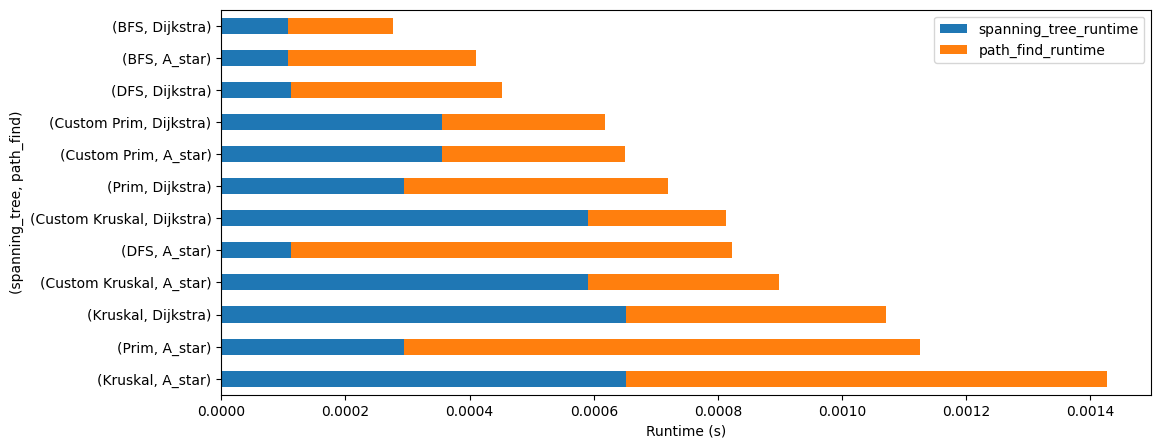

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

sorted_results = results.set_index(['spanning_tree', 'path_find']).sort_values(by='total_runtime', ascending=False)

sorted_results[['spanning_tree_runtime', 'path_find_runtime']].plot(kind='barh', stacked=True, ax=ax)
plt.xlabel("Runtime (s)")
plt.ylabel("(spanning_tree, path_find)")
plt.show()